In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
df = pd.read_excel('sample-superstore-subset-excel.xlsx')


# Display the first few rows and summary statistics
print("First few rows of the dataset:")
print(df.head())

print("\nData type information:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())


First few rows of the dataset:
   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   18606  Not Specified      0.01        2.88           0.50            2   
1   20847           High      0.01        2.84           0.93            3   
2   23086  Not Specified      0.03        6.68           6.15            3   
3   23087  Not Specified      0.01        5.68           3.60            3   
4   23088  Not Specified      0.00      205.99           2.50            3   

     Customer Name    Ship Mode Customer Segment Product Category  ...  \
0  Janice Fletcher  Regular Air        Corporate  Office Supplies  ...   
1    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
2    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
3    Bonnie Potter  Regular Air        Corporate  Office Supplies  ...   
4    Bonnie Potter  Express Air        Corporate       Technology  ...   

    Region State or Province       City  Postal Code Or

In [5]:

# Handle missing values
print(df.isnull().sum())

pbm_median=df["Product Base Margin"].median()
df["Product Base Margin"]=df["Product Base Margin"].replace(np.nan,pbm_median)

# Convert data types if necessary
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

df = df.dropna(subset=['Order Date', 'Ship Date'])

# Create any new columns needed for analysis
df['Profit Margin'] = df['Profit'] / df['Sales']


Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
Profit Margin           0
dtype: int64


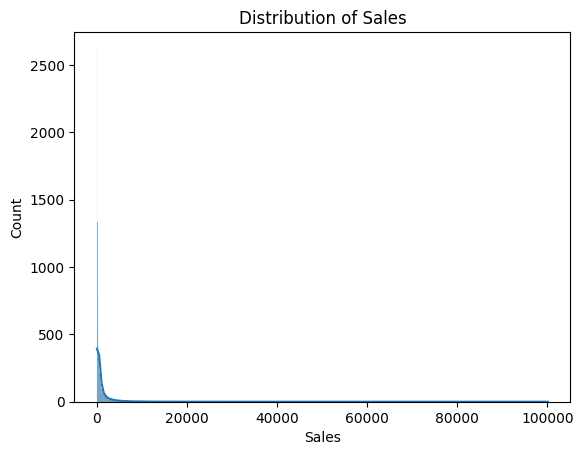

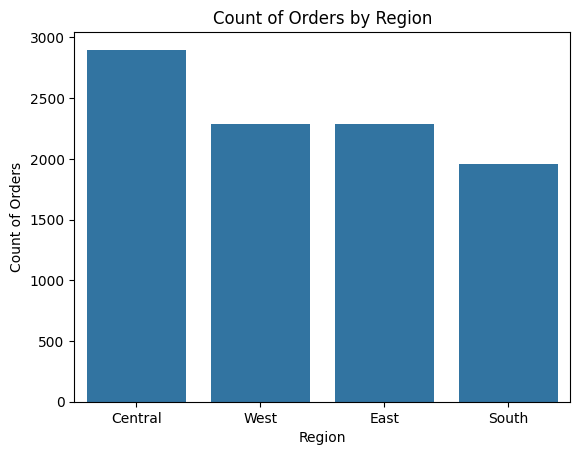

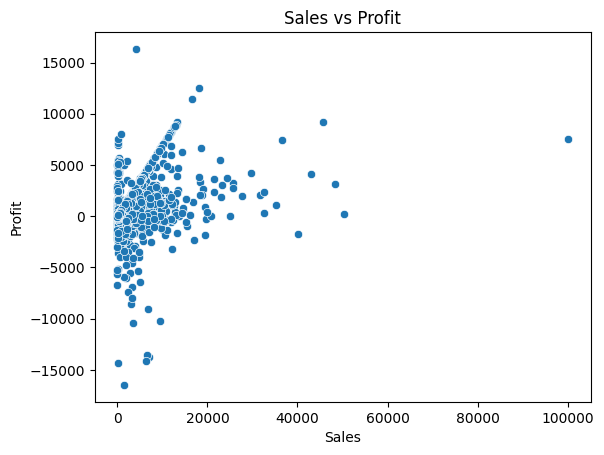

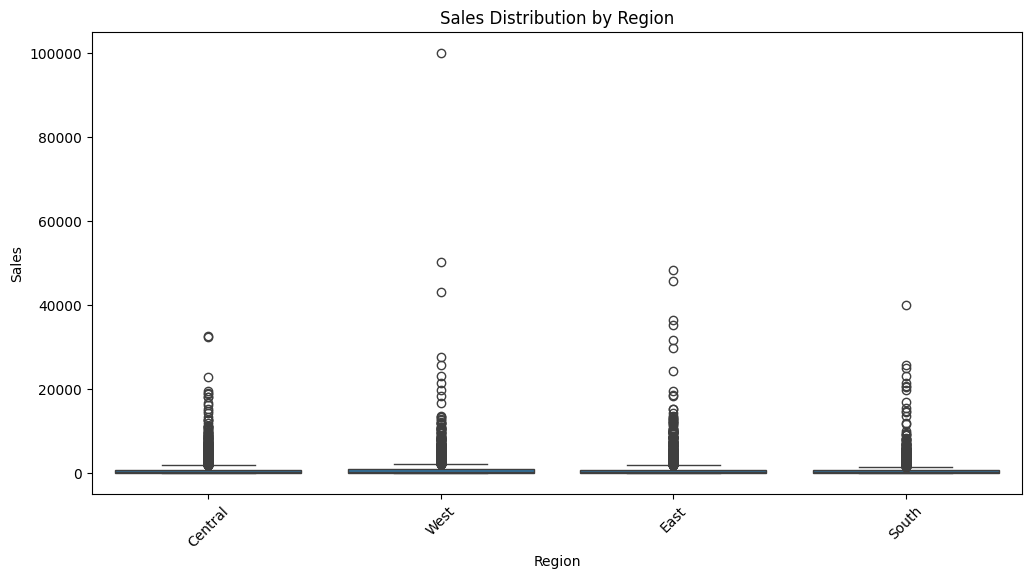

In [6]:

# Univariate analysis
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

sns.countplot(x='Region', data=df)
plt.title('Count of Orders by Region')
plt.xlabel('Region')
plt.ylabel('Count of Orders')
plt.show()



# Bivariate analysis
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Sales', data=df)
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()








In [7]:
# Summary statistics for key variables
key_variables = ['Sales', 'Profit', 'Quantity ordered new', 'Discount']
print(df[key_variables].describe())


# Grouped statistics
region_sales = df.groupby('Region')['Sales'].sum()
print(region_sales)

category_profit = df.groupby('Product Category')['Profit'].mean()
print(category_profit)



               Sales        Profit  Quantity ordered new     Discount
count    9426.000000   9426.000000           9426.000000  9426.000000
mean      949.706272    139.236410             13.798430     0.049628
std      2598.019818    998.486483             15.107688     0.031798
min         1.320000 -16476.838000              1.000000     0.000000
25%        61.282500    -74.017375              5.000000     0.020000
50%       203.455000      2.567600             10.000000     0.050000
75%       776.402500    140.243850             17.000000     0.080000
max    100119.160000  16332.414000            170.000000     0.250000
Region
Central    2540341.62
East       2422804.68
South      1597346.22
West       2391438.80
Name: Sales, dtype: float64
Product Category
Furniture           91.750801
Office Supplies     87.239957
Technology         295.457563
Name: Profit, dtype: float64



### Conclusion

- Summary of key findings.
- Insights based on the analysis.



## Additional Statistical Analysis


In [8]:

from scipy.stats import ttest_ind, chi2_contingency

# Example: T-test for sales in different regions
west_sales = df[df['Region'] == 'West']['Sales'].dropna()
east_sales = df[df['Region'] == 'East']['Sales'].dropna()

t_stat, p_value = ttest_ind(west_sales, east_sales, equal_var=False)
print("T-test results: t-statistic =", t_stat, ", p-value =", p_value)


# Example: Chi-square test for independence between Ship Mode and Customer Segment
contingency_table = pd.crosstab(df['Ship Mode'], df['Customer Segment'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test results: chi2 =", chi2, ", p-value =", p, ", dof =", dof)




T-test results: t-statistic = -0.12699668152509588 , p-value = 0.8989487395387876
Chi-square test results: chi2 = 1.6522944786735398 , p-value = 0.9487444717191827 , dof = 6


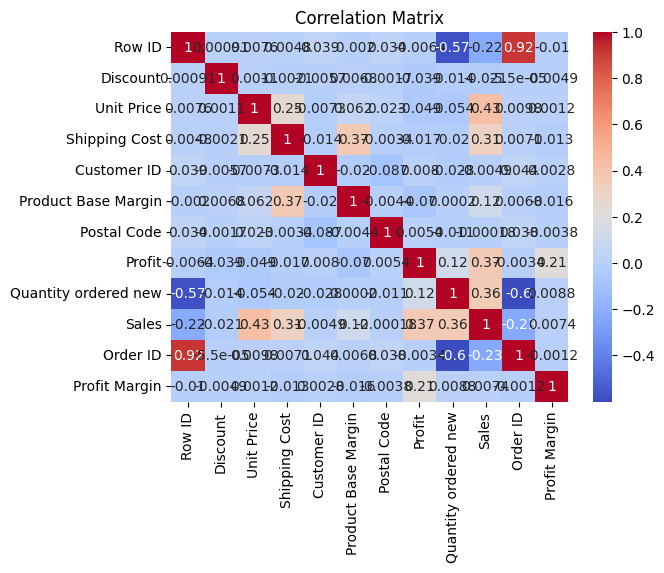

In [9]:
# Selecting only numeric columns for correlation matrix

numeric_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()







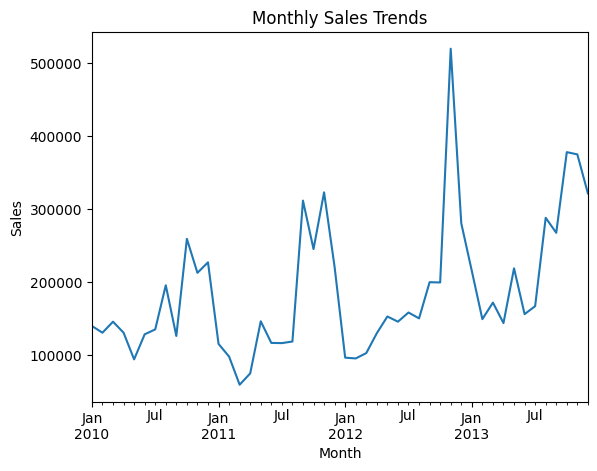

In [10]:

# Plotting sales trends over time
df.set_index('Order Date', inplace=True)
monthly_sales = df['Sales'].resample('M').sum()


# Resample sales data by month
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()







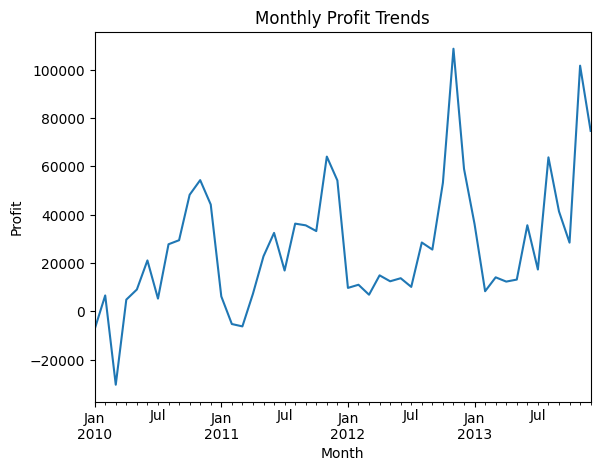

In [11]:

# Plotting profit trends over time
monthly_profit = df['Profit'].resample('M').sum()

monthly_profit.plot()
plt.title('Monthly Profit Trends')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()







  product_category       sales         profit
0        Furniture  3178623.74  177354.298188
1  Office Supplies  2258325.55  451990.216492
2       Technology  3514982.03  683097.884748


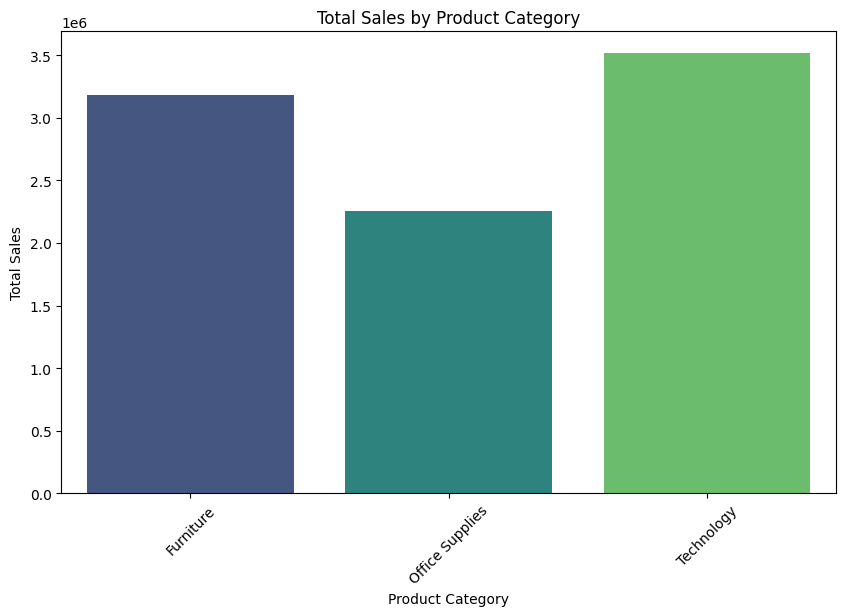

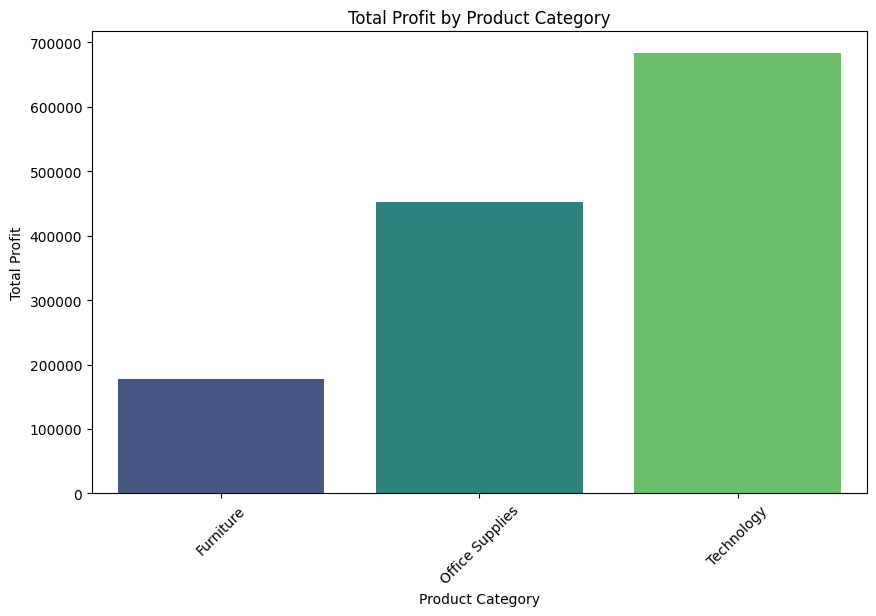

In [12]:

# Identifying top-performing product categories based on total sales and profit
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
category_performance = df.groupby('product_category').agg({'sales': 'sum', 'profit': 'sum'}).reset_index()
print(category_performance)



# Plotting total sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category', y='sales', data=category_performance, hue='product_category', palette='viridis', dodge=False, legend=False)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()






# Plotting total profit by product category
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category', y='profit', data=category_performance, hue='product_category', palette='viridis', dodge=False, legend=False)
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()








In [18]:
# Selecting relevant numerical columns for analysis
columns_of_interest = ['sales', 'discount', 'profit']

# Generating summary statistics grouped by 'Region'
summary_stats = df.groupby('region')[columns_of_interest].describe()

# Displaying the summary statistics
print(summary_stats)
df.describe()

          sales                                                              \
          count         mean          std   min      25%      50%       75%   
region                                                                        
Central  2899.0   876.282035  2041.342685  2.24  60.0450  203.370  771.0350   
East     2289.0  1058.455518  2802.669839  1.32  63.3500  225.140  815.7500   
South    1954.0   817.475036  2173.877698  2.66  58.2500  180.375  644.9375   
West     2284.0  1047.039755  3258.451329  1.62  63.2225  204.730  870.7200   

                   discount            ...              profit              \
               max    count      mean  ...   75%   max   count        mean   
region                                 ...                                   
Central   32589.59   2899.0  0.049348  ...  0.08  0.25  2899.0  179.312027   
East      48418.58   2289.0  0.050000  ...  0.08  0.10  2289.0  164.948094   
South     40136.93   1954.0  0.049401  ...  0.08  0.10  

,row_id,discount,unit_price,shipping_cost,customer_id,product_base_margin,postal_code,ship_date,profit,quantity_ordered_new,sales,order_id,profit_margin
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000
mean,20241.015277,0.049628,88.303686,12.795142,1738.422236,0.512189,52446.327286,2012-03-07 19:16:18.485041408,139.236410,13.798430,949.706272,82318.489073,-0.191287
min,2.000000,0.000000,0.990000,0.490000,2.000000,0.350000,1001.000000,2010-01-02 00:00:00,-16476.838000,1.000000,1.320000,6.000000,-514.137395
25%,19330.250000,0.020000,6.480000,3.192500,898.000000,0.380000,29406.000000,2011-03-09 00:00:00,-74.017375,5.000000,61.282500,86737.250000,-0.563767
50%,21686.500000,0.050000,20.990000,6.050000,1750.000000,0.520000,52302.000000,2012-04-09 00:00:00,2.567600,10.000000,203.455000,88344.500000,0.012840
75%,24042.750000,0.080000,85.990000,13.990000,2578.750000,0.590000,78516.000000,2013-03-28 00:00:00,140.243850,17.000000,776.402500,89987.750000,0.514349
max,26399.000000,0.250000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,2014-01-17 00:00:00,16332.414000,170.000000,100119.160000,91591.000000,999.983030
std,6101.890965,0.031798,281.540982,17.181203,979.167197,0.134711,29374.597802,NaN,998.486483,15.107688,2598.019818,19149.448857,16.787002


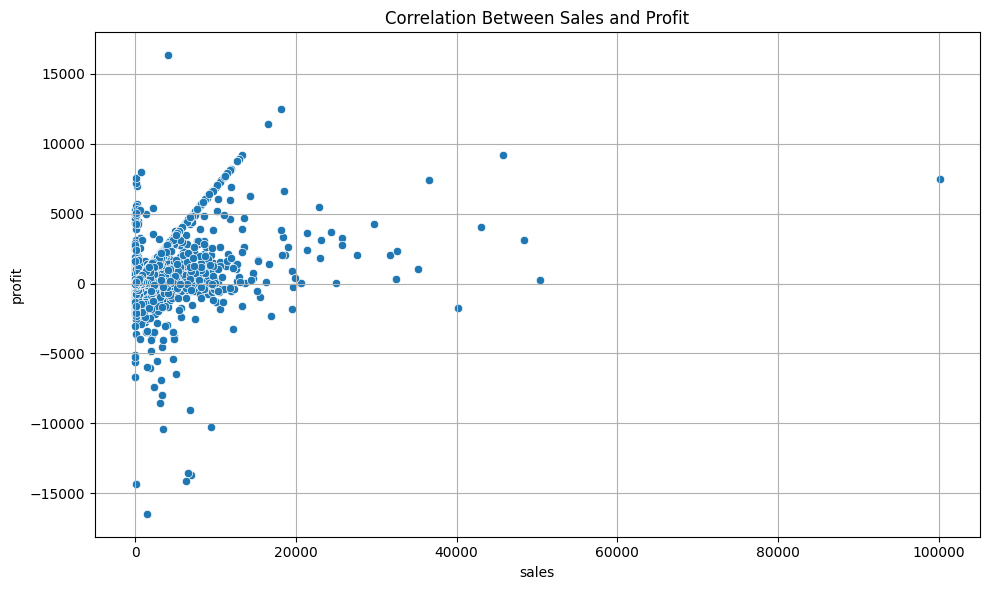

Correlation Coefficient between Sales and Profit: 0.37


In [19]:

# Visualizing the correlation between sales and profit
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')
df = df.dropna(subset=['ship_date'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales', y='profit', data=df)
plt.title('Correlation Between Sales and Profit')
plt.xlabel('sales')
plt.ylabel('profit')
plt.grid(True)
plt.tight_layout()
plt.show()

# Displaying the correlation coefficient
correlation_coefficient = df['sales'].corr(df['profit'])
print(f"Correlation Coefficient between Sales and Profit: {correlation_coefficient:.2f}")









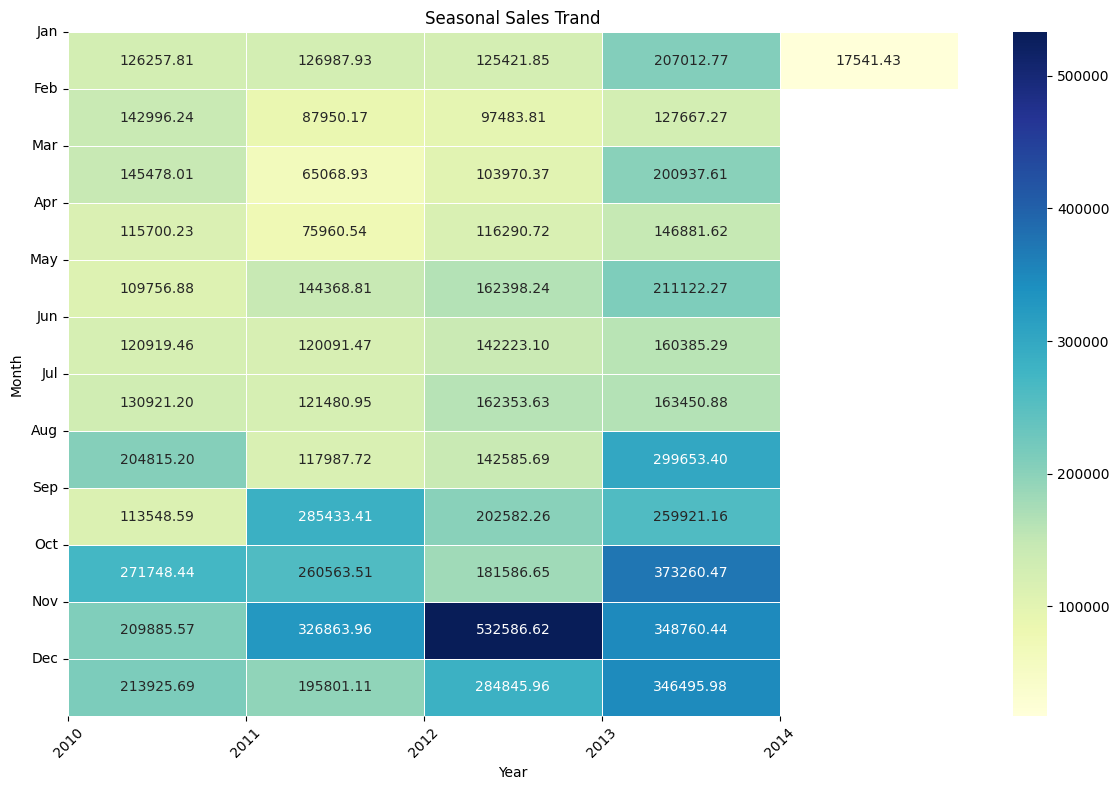

In [20]:

# Analyzing seasonal sales trends
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')
df = df.dropna(subset=['ship_date'])

# Grouping sales data by month and year
df['year'] = df['ship_date'].dt.year
df['month'] = df['ship_date'].dt.month
seasonal_sales = df.groupby(['year', 'month'])['sales'].sum().unstack(level=0)


# Plotting seasonal sales trends
plt.figure(figsize=(12, 8))
sns.heatmap(seasonal_sales, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('Seasonal Sales Trand')
plt.xlabel('Year')
plt.ylabel('Month')
plt.xticks(ticks=range(len(seasonal_sales.columns)), labels=seasonal_sales.columns, rotation=45)
plt.yticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.tight_layout()
plt.show()








        ship_mode       sales
0  Delivery Truck  3706516.02
1     Express Air   701756.34
2     Regular Air  4543658.96


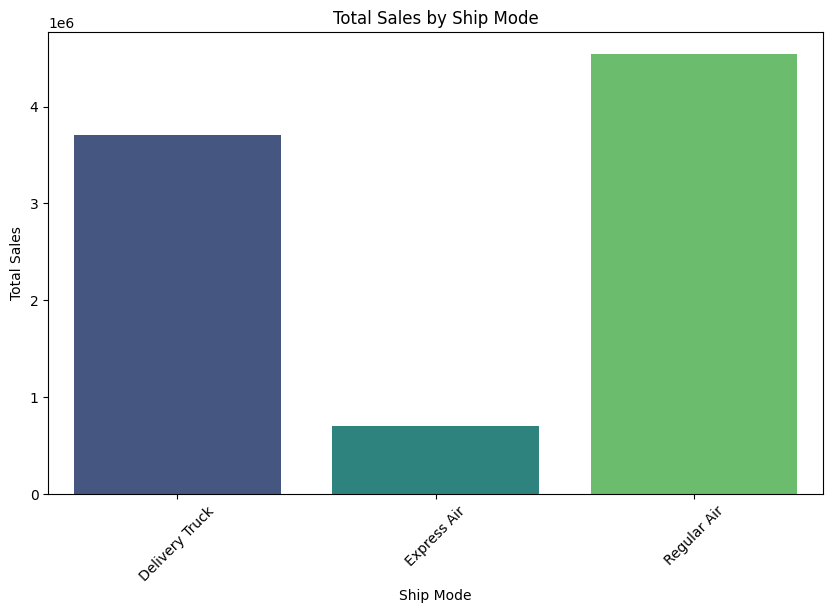

,ship_mode,sales
0,Delivery Truck,3706516.02
1,Express Air,701756.34
2,Regular Air,4543658.96


In [21]:

# Comparing sales across different ship modes
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

sales_by_ship_mode = df.groupby('ship_mode').agg({'sales': 'sum'}).reset_index()
print(sales_by_ship_mode)

plt.figure(figsize=(10, 6))
sns.barplot(x='ship_mode', y='sales', data=sales_by_ship_mode, hue='ship_mode', palette='viridis', dodge=False, legend=False)
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

sales_by_ship_mode


Cleaned column names:
Index(['row_id', 'order_priority', 'discount', 'unit_price', 'shipping_cost',
       'customer_id', 'customer_name', 'ship_mode', 'customer_segment',
       'product_category', 'product_sub-category', 'product_container',
       'product_name', 'product_base_margin', 'region', 'state_or_province',
       'city', 'postal_code', 'ship_date', 'profit', 'quantity_ordered_new',
       'sales', 'order_id', 'profit_margin', 'year', 'month'],
      dtype='object')
Monthly Sales Data:
ship_date
2010-01-31    126257.81
2010-02-28    142996.24
2010-03-31    145478.01
2010-04-30    115700.23
2010-05-31    109756.88
Freq: M, Name: sales, dtype: float64


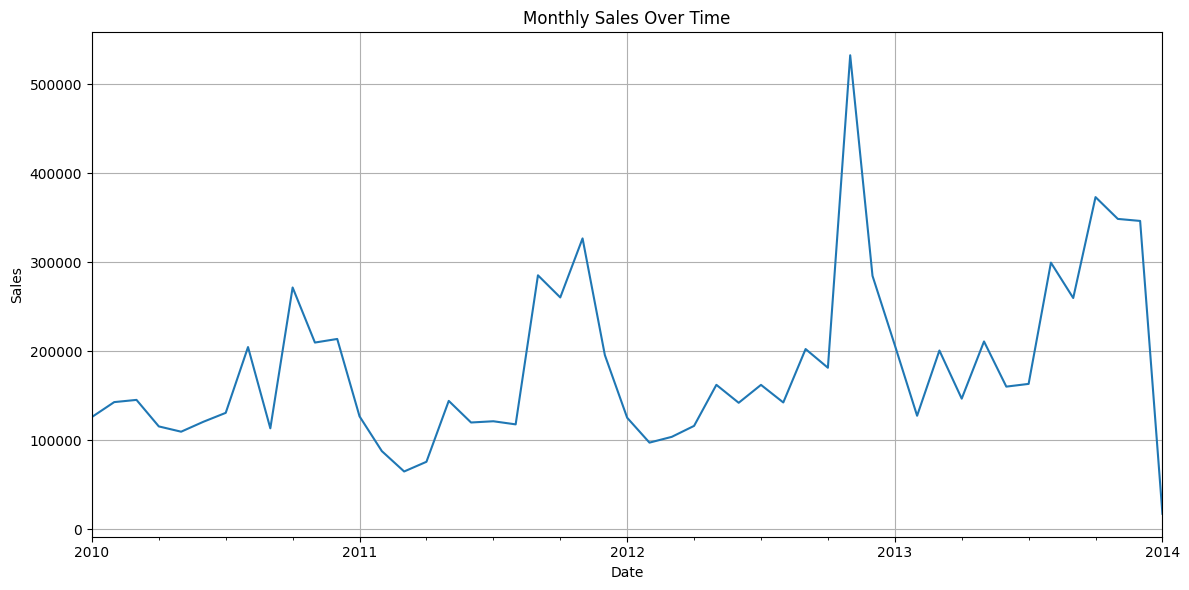

In [22]:
# Ensure column names are clean
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Print column names to verify
print("Cleaned column names:")
print(df.columns)

# Ensure 'Ship Date' column is datetime type
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

# Dropping rows where 'Ship Date' couldn't be converted
df = df.dropna(subset=['ship_date'])
# Set 'ship_date' as the index for resampling
df.set_index('ship_date', inplace=True)

# Resample sales data by month
monthly_sales = df['sales'].resample('M').sum()
print("Monthly Sales Data:")
print(monthly_sales.head())

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

